In [56]:
from nba_api.stats.static import teams
import pandas as pd 
from nba_api.stats.endpoints import leaguegamefinder
import matplotlib.pyplot as plt

In [57]:
nba_teams=teams.get_teams()
nba_teams[:10]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966},
 {'id': 1610612742,
  'full_name': 'Dallas Mavericks',
  'abbreviation': 'DAL',
  'nickname': 'Mavericks',
  'city': 'Dallas',

In [58]:
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key,value in dict_.items():
            out_dict[key].append(value)
    
    return out_dict

In [60]:
dict_nba_team = one_dict(nba_teams)
df_teams = pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [61]:
df_warriors = df_teams[df_teams["nickname"]=="Warriors"]
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [62]:
id_warriors = df_warriors[['id']].values[0][0]
id_warriors
#df_warriors.iloc[[0],[0]]


1610612744

In [64]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

In [65]:
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,0021900967,2020-03-10,GSW vs. LAC,L,239,107,...,0.815,4.0,31.0,35.0,25,3,0,9,17,-24.0
1,22019,1610612744,GSW,Golden State Warriors,0021900944,2020-03-07,GSW vs. PHI,W,240,118,...,0.750,7.0,28.0,35.0,30,4,2,7,19,4.0
2,22019,1610612744,GSW,Golden State Warriors,0021900929,2020-03-05,GSW vs. TOR,L,240,113,...,0.760,14.0,38.0,52.0,34,4,5,15,23,-8.0
3,22019,1610612744,GSW,Golden State Warriors,0021900913,2020-03-03,GSW @ DEN,W,239,116,...,0.636,5.0,30.0,35.0,31,8,3,11,23,16.0
4,22019,1610612744,GSW,Golden State Warriors,0021900901,2020-03-01,GSW vs. WAS,L,239,110,...,0.708,18.0,34.0,52.0,25,7,7,21,24,-14.0


In [66]:
games_home = games[games["MATCHUP"]=="GSW vs. TOR"]
games_away = games[games["MATCHUP"]=="GSW @ TOR"]


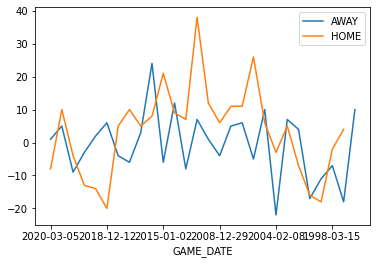

In [67]:
fig,ax=plt.subplots()
games_away.plot(x="GAME_DATE",y="PLUS_MINUS",ax=ax)

games_home.plot(x="GAME_DATE",y="PLUS_MINUS",ax=ax)
ax.legend(["AWAY","HOME"])
plt.show()
